In [1]:
%cd /scratch/bruingjde/SNAM2021-code/

from constants import *

/scratch/bruingjde/SNAM2021-code


In [2]:
def plot_datetime_strategies(
  datetimes: pd.Series, *,
  time_strategies = tlp.TIME_STRATEGIES):
  """Plot the mapping from datetime with the various time strategies.
  
  Args:
    datetimes: pd.Series containing all the considered datetimes (one per edge)
    time_strategies: Optional; A list containing functions that can map the
      datetime column of the edgelist to a float. See 
      tlp.feature.TIME_STRATEGIES.
  
  Usage:
    tlp.analysis.plot_datetime_strategies(edgelist['datetime'])
  """
  index = pd.to_datetime(
    np.linspace(datetimes.min().value, datetimes.max().value))
  with plt.rc_context({'xtick.top': True, 'ytick.right': True}):
    _, ax = plt.subplots(figsize=(4,4))
    df = pd.DataFrame(
      {str: func(index) for str, func in time_strategies.items()}, 
      index=index)
    df.plot(ax=ax, xlabel='Year', ylabel='Proportion',  
            xlim=datetimes.agg(['min', 'max']), ylim=(0,1))
    
    ax.legend(title='Time strategy') # type: ignore
     # type: ignore

In [3]:
df = pd.read_pickle('data/01/edgelist.pkl')

In [28]:
df = df[df['datetime'].between(pd.Timestamp('1995-12-31'), pd.Timestamp('2005-01-01'))]

In [29]:
index = pd.to_datetime(np.linspace(df['datetime'].min().value, df['datetime'].max().value))

In [30]:
index_unix = index.astype(np.int64) / (365*24*3600e9)

In [31]:
index_unix = np.linspace(start=min(index_unix), stop=max(index_unix))

In [32]:
time_strategies['lin'](index_unix)

array([0.2       , 0.21632653, 0.23265306, 0.24897959, 0.26530612,
       0.28163265, 0.29795918, 0.31428571, 0.33061224, 0.34693878,
       0.36326531, 0.37959184, 0.39591837, 0.4122449 , 0.42857143,
       0.44489796, 0.46122449, 0.47755102, 0.49387755, 0.51020408,
       0.52653061, 0.54285714, 0.55918367, 0.5755102 , 0.59183673,
       0.60816327, 0.6244898 , 0.64081633, 0.65714286, 0.67346939,
       0.68979592, 0.70612245, 0.72244898, 0.73877551, 0.75510204,
       0.77142857, 0.7877551 , 0.80408163, 0.82040816, 0.83673469,
       0.85306122, 0.86938776, 0.88571429, 0.90204082, 0.91836735,
       0.93469388, 0.95102041, 0.96734694, 0.98367347, 1.        ])

In [33]:
def lin(x):
  return .2 + .8 * (x-min(x)) / (max(x)-min(x))

In [34]:
def exp(x):
  return .2 + 0.8 * (np.exp(3*(x-min(x))/(max(x)-min(x)))-1) / (np.exp(3)-1)

In [35]:
def sqrt(x):
  return .2 + 0.8 * np.sqrt((x-min(x))/(max(x)-min(x)))

In [36]:
time_strategies = {'lin': lin, 'exp': exp, 'sqrt': sqrt}

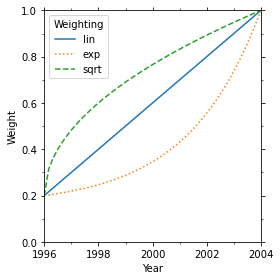

In [47]:
linestyles = ['solid', 'dotted', 'dashed']
with plt.rc_context(rc):
  _, ax = plt.subplots(figsize=(4,4))
  for (strategy_str, strategy_func), linestyle in zip(time_strategies.items(), linestyles):
    ax.plot(index, strategy_func(index_unix), label=strategy_str, linestyle=linestyle)
  ax.legend(title='Weighting')
  ax.set_xlim(pd.Timestamp('1995-12-31'), max(index))
  ax.set_ylim((0,1))
  ax.set_xlabel('Year')
  ax.set_ylabel('Weight')
  ax.xaxis.set_major_locator(matplotlib.dates.YearLocator(2))
  ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
  ax.xaxis.set_minor_locator(matplotlib.dates.YearLocator(1))
  ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.1))
  plt.tight_layout()
  plt.savefig('figures/time-strategies.pdf')

In [38]:
index

DatetimeIndex([          '1996-01-01 00:01:01',
               '1996-02-29 15:12:02.224489856',
               '1996-04-29 06:23:03.448979584',
               '1996-06-27 21:34:04.673469440',
               '1996-08-26 12:45:05.897959168',
               '1996-10-25 03:56:07.122449024',
               '1996-12-23 19:07:08.346938752',
               '1997-02-21 10:18:09.571428608',
               '1997-04-22 01:29:10.795918336',
               '1997-06-20 16:40:12.020408192',
               '1997-08-19 07:51:13.244897920',
               '1997-10-17 23:02:14.469387776',
               '1997-12-16 14:13:15.693877504',
               '1998-02-14 05:24:16.918367360',
               '1998-04-14 20:35:18.142857216',
               '1998-06-13 11:46:19.367346944',
               '1998-08-12 02:57:20.591836672',
               '1998-10-10 18:08:21.816326528',
               '1998-12-09 09:19:23.040816384',
               '1999-02-07 00:30:24.265306112',
               '1999-04-07 15:41:25.4897